In [1]:
from torchsummary import summary
import reinforcement
import gymnasium as gym
import torch
import ale_py
import time

In [2]:
model = reinforcement.CNN(3)
print(model)
summary(model, (96, 96, 3), device="cpu")

CNN(
  (q1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(9, 9), stride=(4, 4), padding=(4, 4), bias=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(32, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (q2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=16, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=16, out_features=3, bias=True)
    (4): Softmax(dim=-1)
  )
)
----------------------------------------------------------------
        Layer (typ

In [3]:
env = gym.make("ALE/Pacman-v5")
#env = gym.make("CarRacing-v3")

#model = CNN(env.action_space.shape)
device = "cuda"
print(env.observation_space, env.action_space)
state_shape = env.observation_space.shape
action_shape = 5 #env.action_space.shape
model = reinforcement.CNN(action_shape, input_shape = state_shape).to(device)

torch.cuda.empty_cache()
#rewards = reinforcement.train_qlearn(model, env, num_episodes=1000, gamma=0.9)
torch.cuda.empty_cache()

Box(0, 255, (250, 160, 3), uint8) Discrete(5)


In [4]:
def test_qmodel(model):
    env = gym.make("CarRacing-v3", continuous=False, render_mode="human")
    state, *_ = env.reset()
    done = False
    total_reward = 0

    while not done:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            q_values = model(state_tensor)
        action = q_values.to("cpu").argmax().item()

        next_state, reward, terminal, truncated, info = env.step(action)
        done = terminal or truncated
        total_reward += reward
        state = next_state

        time.sleep(0.01) # Adjust sleep time for rendering speed

    env.close()
    return total_reward

In [ ]:
#env = gym.make("ALE/Riverraid-v5")
env = gym.make("ALE/Pacman-v5")
#env = gym.make("CarRacing-v3", continuous = False)

env.reset()

#model = CNN(env.action_space.shape)
device = "cpu"
state_shape = env.observation_space.shape
action_shape = env.action_space.n

print(env.observation_space, env.action_space, state_shape, action_shape)

model = reinforcement.CNN(action_shape, frame_count=4, layer_channels=32, input_shape = state_shape).to(device)
rewards = reinforcement.train_reinforce_frames(model, env, nframes = 4, num_episodes=1000, gamma=0.9)

Box(0, 255, (250, 160, 3), uint8) Discrete(5) (250, 160, 3) 5
Episode 1/1000, Steps in Episode: 348, Total Reward: -25.0, Time Elapsed: 2.289294300004258 seconds
Action Time: 1.6413, Step Time: 0.2287, Sample Time: 0.0001, Q Time: 0.8270, Train Time: 1.4581


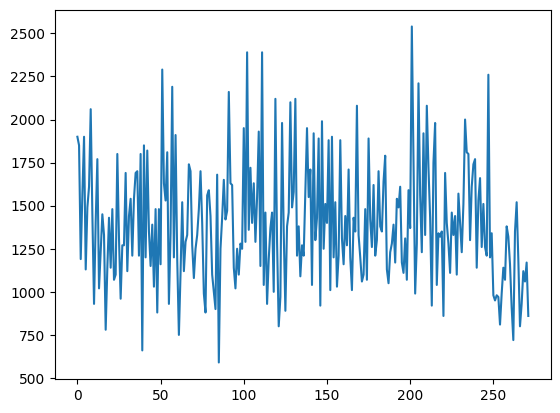

In [6]:
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.show()

In [ ]:
torch.save(model.state_dict(), "model.pth")